## AI-Driven Optimal Placement of Electric Vehicles Charging Stations in Kenya

### Business Understanding 

#### Backgound Information & Overview

Kenya is undergoing a transportation and energy transformation, with electric vehicle (EV) adoption increasing due to rising fuel costs, government incentives, and a global push for sustainability efforts. However, the absence of a data-driven approach to charging station placement is slowing down EV adoption. Currently, charging station deployment is largely arbitrary, reactive, or limited to a few locations, leading to underutilization, range anxiety, and inefficient infrastructure investment.

#### Problem Statement

The adoption of electric vehicles (EVs) in Kenya is increasing, but the absence of a well-planned, optimized EV charging infrastructure remains a major barrier to widespread adoption. Current charging stations are placed without data-driven insights, leading to low utilization rates, inconvenient locations, and poor return on investment for operators.

* current number EV charging stations
* 

#### Proposed Solution

By integrating machine learning, geospatial analytics, and optimization models, this AI-driven platform will revolutionize EV infrastructure planning in Kenya. The solution ensures that charging stations are placed where they are most needed, cost-effective, and energy-efficient, paving the way for a sustainable and profitable EV ecosystem.

* Using K-Means Clustering, DBSCAN, and Hierarchical Clustering to help map out the best possible station locations based on geography and infrastructure constraints.
* Use Graph-based Routing and Dijkstra’s Algorithm to ensure stations are placed within an optimal travel distance for EV users. For example ensuring no driver needs to travel more than 5 km to find a charging station.
* Use Random Forest Regression, XGBoost, and Gradient Boosting Machines (GBM) to identify the key drivers of charging station demand based on traffic volume, population density, nearby commercial hubs, weather conditions and charging station accessibility.

#### Objectives

This project seeks to solve this by developing an AI-powered platform that leverages machine learning, geospatial data, and predictive analytics to identify optimal locations for EV charging stations.

The platform will enable:

* EV charging network planners to maximize utilization and profitability by selecting high-demand locations.
* Government agencies to accelerate green mobility initiatives through data-backed decision-making.
* Investors to make informed funding decisions, ensuring high ROI.
* EV users to access conveniently located charging stations, improving the overall user experience.

#### Metrics of Success

1. The model should correctly predict at least 90% of high-demand locations, minimizing false positives and negatives when identifying optimal sites. 
2. The model should achieve an R² score of at least 0.85, ensuring strong correlation between predicted and actual charging demand.
3. At least 80% of the suggested locations should be within 500 meters of a power grid connection, ensuring practical deployment feasibility.
4. The model should maintain an accuracy above 85% when tested on new urban areas, ensuring adaptability as Nairobi’s EV market grows.





### Data Understanding

The data is sourced from the U.S. Department of Transportation, Bureau of Transportation Statistics, about Electric Vehicle Public Charging Stations in the United States as of January 2020. Link - https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

### Importin the Relevant Libraries

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as Mf
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import re
from datetime import datetime, timedelta
from typing import List, Tuple, Optional
import ast
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [181]:
#Alternative_Fueling_Stations.csv

# Load the first sheet into a DataFrame
df = pd.read_csv('Alternative_Fueling_Stations.csv')

# Display the first few rows to understand the structure
df.head()


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,open_date,owner_type_code,restricted_access,status_code,funding_sources,facility_type,station_name,station_phone,updated_at,geocode_status,latitude,longitude,city,country,intersection_directions,plus4,state,street_address,zip,bd_blends,cng_dispenser_num,cng_fill_type_code,cng_has_rng,cng_psi,cng_renewable_source,cng_total_compression,cng_total_storage,cng_vehicle_class,e85_blender_pump,e85_other_ethanol_blends,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,hy_is_retail,hy_pressures,hy_standards,hy_status_link,lng_has_rng,lng_renewable_source,lng_vehicle_class,lpg_nozzle_types,lpg_primary,ng_fill_type_code,ng_psi,ng_vehicle_class,rd_blended_with_biodiesel,rd_blends,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,MD,12/1/2010 12:00:00 AM,T,NaN,E,NaN,STANDALONE_STATION,Spire - Montgomery Operations Center,NaN,10/11/2024 6:09:31 PM,200-9,32.367916,-86.267021,Montgomery,US,NaN,NaN,AL,2951 Chestnut St,36107,NaN,1.0,B,0.0,3600,NaN,NaN,NaN,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,LD,12/15/1996 12:00:00 AM,LG,NaN,E,NaN,FLEET_GARAGE,Metropolitan Atlanta Rapid Transit Authority,NaN,2/12/2024 9:24:44 PM,200-8,33.821911,-84.367461,Atlanta,US,NaN,NaN,GA,2424 Piedmont Rd NE,30324,NaN,NaN,Q,NaN,3000,NaN,30.0,NaN,LD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,HD,1/1/1997 12:00:00 AM,P,NaN,E,NaN,STANDALONE_STATION,United Parcel Service,NaN,11/13/2024 3:59:38 PM,200-9,33.760256,-84.543822,Atlanta,US,NaN,NaN,GA,270 Marvin Miller Dr,30336,NaN,NaN,B,1.0,3600,NONE,NaN,NaN,HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,MD,1/1/1997 12:00:00 AM,T,0,E,NaN,UTILITY,Arkansas Oklahoma Gas Corp,479-783-3181,4/14/2024 10:11:34 PM,200-9,35.362213,-94.375338,Fort Smith,US,NaN,NaN,AR,2100 S Waldron Rd,72903,NaN,1.0,Q,0.0,3600,NaN,250.0,57855.0,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,MD,11/15/1996 12:00:00 AM,SG,0,E,NaN,AIRPORT,Clean Energy - Logan International Airport,866-809-4869,12/10/2024 9:11:13 PM,GPS,42.374706,-71.026549,East Boston,US,"From Route 1, take the first exit after Callah...",NaN,MA,1000 Cottage St Ext,2128,NaN,4.0,Q,1.0,3000 3600,NONE,850.0,NaN,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [182]:
df.shape

(97882, 80)

The dataset contains information about alternative fueling stations, including EV charging stations. Key columns relevant for EV Charging Station Placement Analysis include:

* access_code – Whether the station is public or private.
* access_days_time – Availability (e.g., 24-hour access).
* fuel_type_code – Identifies the fuel type (e.g., EV for Electric Vehicles).
* groups_with_access_code – Specifies access permissions.
* ev_pricing_fr – Pricing model for EV charging.
* ev_network_ids_station – Identifies the charging network.
* x, y – Longitude and Latitude coordinates of the station (for mapping).
* federal_agency_name – Indicates government or private ownership.

In [183]:
df['fuel_type_code'].value_counts()

ELEC    85398
E85      4719
LPG      2865
BD       1793
RD       1519
CNG      1372
LNG       112
HY        103
Name: fuel_type_code, dtype: int64

* From the above value_counts of the fuel_type_code, we are interested in the electrical vehicles. We proceed to filtering the dataframe for the 'ELEC' fuel_type_code.
* Some of the features are irrelevant to our analysis; First, determine the features of interest in the analysis and filter the dataframe accordingly.

In [184]:
df_elec = df[(df['fuel_type_code'] == 'ELEC') & (df['state'] == 'CA') & (df['city'] == 'Los Angeles')]
df_elec

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,open_date,owner_type_code,restricted_access,status_code,funding_sources,facility_type,station_name,station_phone,updated_at,geocode_status,latitude,longitude,city,country,intersection_directions,plus4,state,street_address,zip,bd_blends,cng_dispenser_num,cng_fill_type_code,cng_has_rng,cng_psi,cng_renewable_source,cng_total_compression,cng_total_storage,cng_vehicle_class,e85_blender_pump,e85_other_ethanol_blends,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,hy_is_retail,hy_pressures,hy_standards,hy_status_link,lng_has_rng,lng_renewable_source,lng_vehicle_class,lpg_nozzle_types,lpg_primary,ng_fill_type_code,ng_psi,ng_vehicle_class,rd_blended_with_biodiesel,rd_blends,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,LD,8/30/1995 12:00:00 AM,P,0,E,NaN,PARKING_GARAGE,Los Angeles Convention Center,213-741-1151,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,West hall and South hall,NaN,CA,1201 S Figueroa St,90015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""""J1772""""]",NaN,NaN,7.0,Non-Networked,NaN,NaN,Free; parking fee,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,LD,10/15/1999 12:00:00 AM,LG,NaN,E,NaN,UTILITY,LADWP - John Ferraro Building,NaN,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,Across Hope,NaN,CA,111 N Hope St,90012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""CHADEMO"",""J1772"",""J1772COMBO""]",12.0,NaN,338.0,Non-Networked,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
131,132,private,Fleet and employee use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1572.0,NaN,10/15/1999 12:00:00 AM,LG,NaN,E,NaN,UTILITY,LADWP - EV Service Center,NaN,1/31/2024 10:07:01 PM,200-8,34.066801,-118.227605,Los Angeles,US,NaN,NaN,CA,1630 N Main St,90012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""CHADEMO"",""J1772""]",1.0,NaN,46.0,Non-Networked,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.227605,34.066801
132,133,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1573.0,NaN,4/1/2019 12:00:00 AM,LG,NaN,E,NaN,UTILITY,LADWP - Fairfax Center,NaN,1/31/2024 10:07:01 PM,200-8,34.036777,-118.368841,Los Angeles,US,NaN,NaN,CA,2311 S Fairfax Ave,90016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""""J1772""""]",NaN,NaN,13.0,Non-Networked,NaN,NaN,Free,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.368841,34.036777
133,134,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1589.0,NaN,10/15/1999 12:00:00 AM,LG,NaN,E,NaN,UTILITY,LADWP - Palmetto Center,NaN,1/31/2024 10:07:01 PM,GPS,34.039736,-118.236065,Los Angeles,US,NaN,NaN,CA,1212 Palmetto St,90013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""""J1772""""]",NaN,NaN,27.0,Non-Networked,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.236065,34.039736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [185]:
# Display the columns
print(df_elec.columns)

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


In [186]:
relevant_columns = [
    'station_name', 'latitude', 'longitude', 'city', 'state',"restricted_access","ev_renewable_source",
    'street_address', 'status_code', 'access_code',"cards_accepted","ev_workplace_charging",
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num', "intersection_directions","owner_type_code",
    'ev_level2_evse_num', 'ev_network', 'ev_pricing',"access_days_time","maximum_vehicle_class","facility_type"
]

Ev_df = df_elec[relevant_columns]
Ev_df

,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,street_address,status_code,access_code,cards_accepted,ev_workplace_charging,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,ev_pricing,access_days_time,maximum_vehicle_class,facility_type
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0,NaN,1201 S Figueroa St,E,public,NaN,0.0,"[""""J1772""""]",NaN,NaN,West hall and South hall,P,7.0,Non-Networked,Free; parking fee,5:30am-9pm; pay lot,LD,PARKING_GARAGE
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,111 N Hope St,E,private,NaN,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",12.0,NaN,Across Hope,LG,338.0,Non-Networked,NaN,For fleet and employee use only,LD,UTILITY
131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,NaN,NaN,1630 N Main St,E,private,NaN,1.0,"[""CHADEMO"",""J1772""]",1.0,NaN,NaN,LG,46.0,Non-Networked,NaN,Fleet and employee use only,NaN,UTILITY
132,LADWP - Fairfax Center,34.036777,-118.368841,Los Angeles,CA,NaN,NaN,2311 S Fairfax Ave,E,private,NaN,0.0,"[""""J1772""""]",NaN,NaN,NaN,LG,13.0,Non-Networked,Free,Fleet use only,NaN,UTILITY
133,LADWP - Palmetto Center,34.039736,-118.236065,Los Angeles,CA,NaN,NaN,1212 Palmetto St,E,private,NaN,1.0,"[""""J1772""""]",NaN,NaN,NaN,LG,27.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,Beatrice St LA,33.981682,-118.414946,Los Angeles,CA,NaN,NaN,12541 Beatrice St,E,public,NaN,0.0,"[""""J1772""""]",NaN,NaN,NaN,NaN,20.0,EVGATEWAY,NaN,24 hours daily,NaN,NaN
97530,5441 E Valley Blvd,34.074090,-118.164775,Los Angeles,CA,NaN,NaN,5441 E Valley Blvd,E,public,NaN,0.0,"[""""J1772""""]",NaN,NaN,NaN,NaN,1.0,FLO,NaN,24 hours daily,NaN,NaN
97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,Los Angeles,CA,NaN,NaN,10250 Constellation Boulevard,E,public,NaN,0.0,"[""""J1772""""]",NaN,NaN,Level P2- East Center Wall,NaN,2.0,ChargePoint Network,NaN,24 hours daily,NaN,NaN
97670,Division 10,34.057401,-118.216279,Los Angeles,CA,NaN,NaN,742 N Mission Rd,E,public,NaN,0.0,"[""""J1772""""]",NaN,NaN,NaN,NaN,2.0,EVGATEWAY,NaN,24 hours daily,NaN,NaN


In [187]:
Mf.check_info(Ev_df)

=============== Dataset Shape =================
(1941, 23)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'restricted_access', 'ev_renewable_source', 'street_address',
       'status_code', 'access_code', 'cards_accepted', 'ev_workplace_charging',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'intersection_directions', 'owner_type_code', 'ev_level2_evse_num',
       'ev_network', 'ev_pricing', 'access_days_time', 'maximum_vehicle_class',
       'facility_type'],
      dtype='object')

=============== Data Types =================
station_name                object
latitude                   float64
longitude                  float64
city                        object
state                       object
restricted_access           object
ev_renewable_source         object
street_address              object
status_code                 object
access_code                 object
cards_acc

The dataset comprise of 9093 rows and 3 columns; the **tweet_text**,**emotion_in_tweet_is_directed_at** and **is_there_an_emotion_directed_at_a_brand_or_product**. 
* The tweet_text column contain the tweet or the text written on the twitter platform. The emotiom_in_tweet_is_directed_at column shows items produced as products or evene services by Apple and Google, that the tweets were directed at. The last column shows whether the tweet written had a positive, negative or neutral impact. 
* All

### Data Cleaning Preprocessing
Check for missing value and duplicates

In [188]:
missing_percentage_df = (Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False).reset_index()
missing_percentage_df.columns = ['Column Name', 'Missing Percentage']

missing_percentage_df

,Column Name,Missing Percentage
0,ev_renewable_source,99.896960
1,ev_level1_evse_num,99.845440
2,cards_accepted,95.672334
3,ev_dc_fast_num,95.569294
4,restricted_access,91.705307
5,maximum_vehicle_class,91.602267
6,ev_pricing,89.129315
7,facility_type,88.871716
8,owner_type_code,86.862442
9,intersection_directions,71.973210


In [189]:
Ev_df.shape

(1941, 23)

We established a 20% threshold for missing values to ensure data quality while retaining critical information. This decision was driven by the fact that the ev_level2_evse_num column, which has approximately 18% missing values, is essential for our analysis. Level 2 EV chargers play a pivotal role in the charging infrastructure, influencing station accessibility and user convenience. By setting this threshold, we strike a balance between maintaining robust dataset integrity and preserving key variables necessary for meaningful insights.

In [190]:
# Dropping columns with above 20% missing values
def drop_high_null_columns(df, threshold=20):
    return df.loc[:, (df.isna().sum() / len(df) * 100) <= threshold]

df_20_percent=drop_high_null_columns(Ev_df, threshold=20)
df_20_percent.head(3)
    

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only
131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,1630 N Main St,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only


In [191]:
Ev_df1 = df_20_percent.copy()

In [192]:
# Checking for duplicates 
print(f"We have {Ev_df1.duplicated().sum()} in our data set")

We have 0 in our data set


In [193]:
# Handling the duplicates 
Ev_df_noduplicate = Ev_df1.drop_duplicates()
# Confirming that the duplicates have been handled
print(f"Our dataframe now has {Ev_df_noduplicate.duplicated().sum()} duplicates")

Our dataframe now has 0 duplicates


In [194]:
Mf.check_info(Ev_df_noduplicate)

=============== Dataset Shape =================
(1941, 13)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'street_address', 'status_code', 'access_code', 'ev_workplace_charging',
       'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
       'access_days_time'],
      dtype='object')

=============== Data Types =================
station_name              object
latitude                 float64
longitude                float64
city                      object
state                     object
street_address            object
status_code               object
access_code               object
ev_workplace_charging    float64
ev_connector_types        object
ev_level2_evse_num       float64
ev_network                object
access_days_time          object
dtype: object

=============== Dataset Information =================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 126 to 97745
Data colu

In [195]:
# Making copy of the dataframe
Ev_df2 = Ev_df_noduplicate.copy()


In [196]:
# Handling the missing values
Ev_df2['ev_level2_evse_num'] = Ev_df2['ev_level2_evse_num'].fillna(0)
Ev_df2 = Ev_df2.dropna()
print(f"We have {Ev_df2.isna().sum().sum()} nulls in our dataframe")

We have 0 nulls in our dataframe


In [197]:
# Viewing the numerical columns
Numericals = Ev_df2.select_dtypes(include='number')
Numericals.head(3)

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num
126,34.040539,-118.271387,0.0,7.0
127,34.059133,-118.248589,1.0,338.0
131,34.066801,-118.227605,1.0,46.0


In [198]:
# Viewing the Categorical Columns
categoricals = Ev_df2.select_dtypes(include='object')
categoricals.head(3)

,station_name,city,state,street_address,status_code,access_code,ev_connector_types,ev_network,access_days_time
126,Los Angeles Convention Center,Los Angeles,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,Los Angeles,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,For fleet and employee use only
131,LADWP - EV Service Center,Los Angeles,CA,1630 N Main St,E,private,"[""CHADEMO"",""J1772""]",Non-Networked,Fleet and employee use only


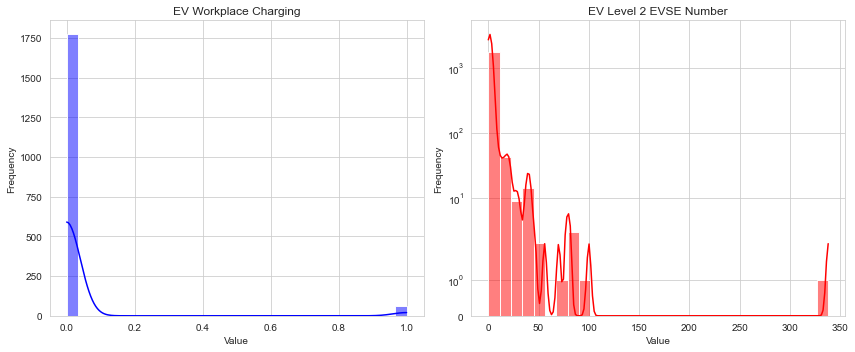

In [199]:
# Checking on the distribution  of the 2 numerical columns 
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 r

# Plot the first histogram
sns.histplot(Numericals["ev_workplace_charging"], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("EV Workplace Charging")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
plt.yscale("symlog")

# Plot the second histogram
sns.histplot(Numericals["ev_level2_evse_num"], bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title("EV Level 2 EVSE Number")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
plt.yscale("symlog")

plt.tight_layout()
plt.show()

##### Imputing ev_level2_evse_num with zeroes
- In this context, missing values are not due to data collection errors but rather signify that no Level 2 chargers exist at the station. Imputing with a mean or median would artificially inflate infrastructure data, leading to misleading insights. Assigning zero ensures data integrity by accurately reflecting station capabilities without introducing false assumptions.
##### Imputing ev_workplace_charging column with median
- Since the data is right-skewed, using the median is the best choice. Unlike the mean, which can be pulled up by a few stations with a high number of chargers, the median gives a more balanced and realistic estimate. This approach prevents overestimation, keeps the data representative, and maintains the true distribution of workplace chargers.

#### Categoricals

In [200]:
categoricals['state'].value_counts()[:20]

CA    1834
Name: state, dtype: int64

#### Preprocessing

In [201]:
# cLeaning and encoding the station_name columns
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if isinstance(station_name, str):  
        parts = station_name.strip().split(' - ', 1)
        return parts if len(parts) == 2 else (station_name, station_name)
    return None, None  # Handles NaN or non-string values

# Apply the function to split the column efficiently
Ev_df2[['station_region', 'station_subregion']] = (
    Ev_df2['station_name']
    .astype(str)  # Convert everything to string to avoid errors
    .str.strip()
    .str.split(' - ', n=1, expand=True)
    .fillna(method='ffill', axis=1)  # Fill second column with first if there's no hyphen
)
Ev_df2[['station_region', 'station_subregion']]
Ev_df2['station_region_encoded'] = Ev_df2['station_region'].factorize()[0]
Ev_df2['station_subregion_encoded'] = Ev_df2['station_subregion'].factorize()[0]
Ev_df2.head(3)


,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1
131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,1630 N Main St,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2


In [202]:
# Cleaning the access daytime column
def calculate_hours(start_time: str, end_time: str) -> float:
    """
    Calculate the number of hours between start and end time.
    """
    start = datetime.strptime(start_time, "%H:%M")
    end = datetime.strptime(end_time, "%H:%M")
   
    if end < start:
        end = end + timedelta(days=1)
   
    diff = end - start
    hours = diff.total_seconds() / 3600
   
    return round(hours, 2)

def extract_time_and_hours(text: str) -> dict:
    """
    Extract time information and calculate hours from parking lot access descriptions.
    """
    # Handle non-string input
    if pd.isna(text) or not isinstance(text, str):
        return {
            'times': None,
            'hours': None
        }
   
    # Check for 24 hours daily first
    if '24 hours' in text.lower():
        return {
            'times': [('all', '00:00', '23:59')],
            'hours': 24.0
        }
   
    # Pattern for day-specific times
    day_specific_pattern = r'(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\s+(\d{1,2}:?\d{0,2}(?:am|pm))\s*-\s*(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    # Pattern for general time range
    general_time_pattern = r'(\d{1,2}:?\d{0,2}(?:am|pm))-(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    def standardize_time(time_str: str) -> str:
        """Convert time strings to 24-hour format."""
        time_str = time_str.strip().lower()
       
        if ':' not in time_str:
            time_str = time_str.replace('am', ':00am').replace('pm', ':00pm')
       
        hour = int(time_str.split(':')[0])
        minutes = int(time_str.split(':')[1][:2])
        is_pm = 'pm' in time_str
       
        if is_pm and hour != 12:
            hour += 12
        elif not is_pm and hour == 12:
            hour = 0
           
        return f"{hour:02d}:{minutes:02d}"
   
    # Try to find day-specific times first
    day_matches = re.findall(day_specific_pattern, text)
    if day_matches:
        # Take only the first day's times since they're all the same
        day, start, end = day_matches[0]
        start_time = standardize_time(start)
        end_time = standardize_time(end)
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [(day, start_time, end_time)],
            'hours': hours
        }
   
    # If no day-specific times found, look for general time range
    general_matches = re.findall(general_time_pattern, text)
    if general_matches:
        start_time = standardize_time(general_matches[0][0])
        end_time = standardize_time(general_matches[0][1])
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [('all', start_time, end_time)],
            'hours': hours
        }
   
    return {
        'times': None,
        'hours': None
    }

def process_dataframe(df, column_name='access_days_time'):
    """
    Process the dataframe and add hours column.
   
    Args:
        df: pandas DataFrame
        column_name: name of the column containing time information
   
    Returns:
        pandas DataFrame with new 'access_hours' column
    """
 
    # Apply the extraction function to each row
    results = df[column_name].apply(extract_time_and_hours)
   
    # Add the hours as a new column
    df['access_hours'] = results.apply(lambda x: x['hours'])
   
    return df

Ev_df2 = process_dataframe(Ev_df2)
Ev_df2[:5]

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,NaN
131,LADWP - EV Service Center,34.066801,-118.227605,Los Angeles,CA,1630 N Main St,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,NaN
132,LADWP - Fairfax Center,34.036777,-118.368841,Los Angeles,CA,2311 S Fairfax Ave,E,private,0.0,"[""""J1772""""]",13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,NaN
133,LADWP - Palmetto Center,34.039736,-118.236065,Los Angeles,CA,1212 Palmetto St,E,private,1.0,"[""""J1772""""]",27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,NaN


In [203]:
Ev_df2['access_hours'].isna().sum()

79

Frequency encoding helps optimize EV station placement by turning city names into numbers based on how often they appear in the dataset. This allows machine learning models to identify high-demand areas—like big cities needing more charging stations—without adding unnecessary complexity

In [204]:
# some rows have no clear time on what time they operate so we decided to fill those rows with zero
Ev_df2['access_hours'] = Ev_df2['access_hours'].fillna(0)

In [205]:
# Cleaning the 'state' and 'city' columns
def clean_and_encode_ev_data(df):
    # Drop missing values in 'state' and 'city' columns early
    df = df.dropna(subset=["state", "city"]).copy()

    # Standardizing states and cities
    df["state"] = df["state"].str.upper().str.strip().replace({
        "CALIFORNIA": "CA",
        "NEW YORK STATE": "NY",
        "FLORIDA": "FL",
    })

    df["city"] = df["city"].str.lower().str.strip().replace({
        "nyc": "new york",
        "sf": "san francisco",
        "san fran": "san francisco",
        "la": "los angeles",
    })

    # Apply frequency encoding
    df["state_freq_encoded"] = df["state"].map(df["state"].value_counts())
    df["city_freq_encoded"] = df["city"].map(df["city"].value_counts())

    return df
Ev_df2 = clean_and_encode_ev_data(Ev_df2)    
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834
131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,1630 N Main St,E,private,1.0,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,0.0,1834,1834
132,LADWP - Fairfax Center,34.036777,-118.368841,los angeles,CA,2311 S Fairfax Ave,E,private,0.0,"[""""J1772""""]",13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,0.0,1834,1834
133,LADWP - Palmetto Center,34.039736,-118.236065,los angeles,CA,1212 Palmetto St,E,private,1.0,"[""""J1772""""]",27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,0.0,1834,1834


In [206]:
# Cleaning the Access code column
Ev_df2["access_code_cleaned"] = Ev_df2["access_code"].astype(str).str.lower().str.strip().map({"private": 0, "public": 1})
Ev_df2.tail()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned
97433,Beatrice St LA,33.981682,-118.414946,los angeles,CA,12541 Beatrice St,E,public,0.0,"[""""J1772""""]",20.0,EVGATEWAY,24 hours daily,Beatrice St LA,Beatrice St LA,1744,1795,24.0,1834,1834,1
97530,5441 E Valley Blvd,34.074090,-118.164775,los angeles,CA,5441 E Valley Blvd,E,public,0.0,"[""""J1772""""]",1.0,FLO,24 hours daily,5441 E Valley Blvd,5441 E Valley Blvd,1745,1796,24.0,1834,1834,1
97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,los angeles,CA,10250 Constellation Boulevard,E,public,0.0,"[""""J1772""""]",2.0,ChargePoint Network,24 hours daily,CONSTELLATION PHASE 2- P2 6,CONSTELLATION PHASE 2- P2 6,1746,1797,24.0,1834,1834,1
97670,Division 10,34.057401,-118.216279,los angeles,CA,742 N Mission Rd,E,public,0.0,"[""""J1772""""]",2.0,EVGATEWAY,24 hours daily,Division 10,Division 10,1747,1798,24.0,1834,1834,1
97745,182 S Alameda St,34.047485,-118.237956,los angeles,CA,182 S Alameda St,E,public,0.0,"[""""J1772""""]",1.0,FLO,24 hours daily,182 S Alameda St,182 S Alameda St,1748,1799,24.0,1834,1834,1


In [207]:
# Clean the ev_network column (remove extra spaces, unify "Non-Network" with "Non-Networked")
Ev_df2["ev_network"] = Ev_df2["ev_network"].str.strip().replace({"Non-Network": "Non-Networked"})

# Perform frequency encoding
freq_encoding = Ev_df2["ev_network"].value_counts().to_dict()
Ev_df2["ev_network_encoded"] = Ev_df2["ev_network"].map(freq_encoding)

Ev_df2.head(2)


,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834,1,92
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834,0,92


In [208]:
Ev_df2["ev_connector_types"].value_counts()

[""J1772""]                         1765
["CHADEMO","J1772COMBO"]              26
["CHADEMO","J1772","J1772COMBO"]      15
[""CHADEMO""]                         10
[""TESLA""]                            6
[""J1772COMBO""]                       5
["CHADEMO","J1772"]                    4
["J1772","NEMA515"]                    1
["J1772","J1772COMBO"]                 1
["J1772","NEMA520"]                    1
Name: ev_connector_types, dtype: int64

In [209]:
# Cleaning the ev_connector_types  column
# Function to clean and parse the ev_connector_types column
def clean_ev_connector_types(df, column_name="ev_connector_types"):
    # Strip spaces and remove unwanted quotes
    df[column_name] = df[column_name].str.replace(r'""', '"', regex=True).str.strip()
    # Convert string lists to actual Python lists
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return df
# Apply function
Ev_df2 = clean_ev_connector_types(Ev_df2)
Ev_df2.tail(3)

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,los angeles,CA,10250 Constellation Boulevard,E,public,0.0,[J1772],2.0,ChargePoint Network,24 hours daily,CONSTELLATION PHASE 2- P2 6,CONSTELLATION PHASE 2- P2 6,1746,1797,24.0,1834,1834,1,975
97670,Division 10,34.057401,-118.216279,los angeles,CA,742 N Mission Rd,E,public,0.0,[J1772],2.0,EVGATEWAY,24 hours daily,Division 10,Division 10,1747,1798,24.0,1834,1834,1,26
97745,182 S Alameda St,34.047485,-118.237956,los angeles,CA,182 S Alameda St,E,public,0.0,[J1772],1.0,FLO,24 hours daily,182 S Alameda St,182 S Alameda St,1748,1799,24.0,1834,1834,1,383


In [210]:
def encode_connector_types(df, column_name='ev_connector_types'):
    """
    One-hot encode a column containing lists of EV connector types.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the connector types column
    column_name (str): Name of the column containing lists of connector types
    
    Returns:
    pandas.DataFrame: DataFrame with encoded connector types
    """
    from sklearn.preprocessing import MultiLabelBinarizer
    import pandas as pd
    
    # Create a copy to avoid modifying the original DataFrame
    df_encoded = df.copy()

    # Ensuring the column contains lists (handle missing values and non-list entries)
    df_encoded[column_name] = df_encoded[column_name].apply(
        lambda x: x if isinstance(x, list) else [] if pd.isna(x) else [x]
    )
    
    # Instanciating MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    # Transform the column into multiple binary columns
    encoded_data = mlb.fit_transform(df_encoded[column_name])
    # Get class names and ensure they're valid column names
    classes = [str(cls).replace(' ', '_') for cls in mlb.classes_]
    
    #  Encoding columns
    encoded_df = pd.DataFrame(encoded_data, columns=classes, index=df_encoded.index)
    # Concatenating the encoded columns with the original dataframe
    result_df = pd.concat([df_encoded, encoded_df], axis=1)
    # Dropping the original column
    result_df.drop(columns=[column_name], inplace=True)
    return result_df
Ev_df2 = encode_connector_types(Ev_df2, 'ev_connector_types')
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0
131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,1630 N Main St,E,private,1.0,46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0
132,LADWP - Fairfax Center,34.036777,-118.368841,los angeles,CA,2311 S Fairfax Ave,E,private,0.0,13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0
133,LADWP - Palmetto Center,34.039736,-118.236065,los angeles,CA,1212 Palmetto St,E,private,1.0,27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0


In [211]:
Ev_df2.isna().sum()

station_name                 0
latitude                     0
longitude                    0
city                         0
state                        0
street_address               0
status_code                  0
access_code                  0
ev_workplace_charging        0
ev_level2_evse_num           0
ev_network                   0
access_days_time             0
station_region               0
station_subregion            0
station_region_encoded       0
station_subregion_encoded    0
access_hours                 0
state_freq_encoded           0
city_freq_encoded            0
access_code_cleaned          0
ev_network_encoded           0
CHADEMO                      0
J1772                        0
J1772COMBO                   0
NEMA515                      0
NEMA520                      0
TESLA                        0
dtype: int64

In [212]:
Ev_df2['street_address'][:4]

126    1201 S Figueroa St
127         111 N Hope St
131        1630 N Main St
132    2311 S Fairfax Ave
Name: street_address, dtype: object

In [213]:
Ev_df2['street_address'].nunique()

1142

#### Onehot encoding the status code

In [214]:
Ev_df2['status_code'].value_counts()

E    1518
T     311
P       5
Name: status_code, dtype: int64

In [215]:
# Apply one-hot encoding
Ev_df2 = pd.get_dummies(Ev_df2, columns=['status_code'])
Ev_df2 

,station_name,latitude,longitude,city,state,street_address,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,public,0.0,7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,private,1.0,338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0
131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,1630 N Main St,private,1.0,46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0
132,LADWP - Fairfax Center,34.036777,-118.368841,los angeles,CA,2311 S Fairfax Ave,private,0.0,13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0
133,LADWP - Palmetto Center,34.039736,-118.236065,los angeles,CA,1212 Palmetto St,private,1.0,27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,Beatrice St LA,33.981682,-118.414946,los angeles,CA,12541 Beatrice St,public,0.0,20.0,EVGATEWAY,24 hours daily,Beatrice St LA,Beatrice St LA,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0
97530,5441 E Valley Blvd,34.074090,-118.164775,los angeles,CA,5441 E Valley Blvd,public,0.0,1.0,FLO,24 hours daily,5441 E Valley Blvd,5441 E Valley Blvd,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0
97545,CONSTELLATION PHASE 2- P2 6,34.056472,-118.417441,los angeles,CA,10250 Constellation Boulevard,public,0.0,2.0,ChargePoint Network,24 hours daily,CONSTELLATION PHASE 2- P2 6,CONSTELLATION PHASE 2- P2 6,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0
97670,Division 10,34.057401,-118.216279,los angeles,CA,742 N Mission Rd,public,0.0,2.0,EVGATEWAY,24 hours daily,Division 10,Division 10,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0


#### Cleaning the Street Address
We standardize the street address column to make the entries more comparable for clustering purposes. The process include
1. Converting the case to lower.
2. Normalizing the direction indicators such as n to north, s to south, w to west and e to east.
3. Standardizing the street abbreviations such as the st to street, blvd to boulevard and dr to drive and av to avenue. This is important for transformation of this column to numericals for clustering purposes.
4. Removal of special characters and the presence of white spaces. 
##### Dealing with street numbers.
Drop the street numbers.Clustering by street type/name will yield more meaningful clusters than using street numbers. Different addresses can have different street numbers that are unrelated to each other. These street numbers could only introduce noise. They are arbitrary,i.e do not indicate meaningful patterns.
To encode the cleaned street addresses, use the common frequency or the label encoding.

In [216]:
import pandas as pd
import re

def clean_street_addresses(df, column_name):
    """
    Clean and standardize street addresses, keeping only the street name
    and converting abbreviations to full words.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the address column
    column_name (str): Name of the column containing street addresses
    
    Returns:
    pandas.DataFrame: DataFrame with cleaned street names
    """
    # Create a copy to avoid modifying the original
    df = df.copy()
    
    # Create a new column for cleaned addresses
    df['cleaned_address'] = df[column_name].astype(str)
    
    # Convert to lowercase
    df['cleaned_address'] = df['cleaned_address'].str.lower()
    
    # Remove street number at the beginning
    df['cleaned_address'] = df['cleaned_address'].str.replace(r'^\d+\s+', '')
    
    # Standardize directional indicators with more flexible matching
    direction_mapping = {
        'n': 'north',
        's': 'south',
        'e': 'east',
        'w': 'west'
    }
    
    for abbr, full in direction_mapping.items():
        # Allow direction to be at the start, end, or between words
        df['cleaned_address'] = df['cleaned_address'].str.replace(rf'(^|\s){abbr}(\s|$)', rf'\1{full}\2')
    
    # Standardize street type abbreviations
    street_type_mapping = {
        'st': 'street',
        'ave': 'avenue',
        'blvd': 'boulevard',
        'dr': 'drive',
        'rd': 'road',
        'ln': 'lane',
        'way': 'way',
        'pl': 'place',
        'plz': 'plaza',
        'cir': 'circle',
        'ct': 'court',
        'ter': 'terrace',
        'pier': 'pier'
    }
    
    for abbr, full in street_type_mapping.items():
        df['cleaned_address'] = df['cleaned_address'].str.replace(f' {abbr}\\b', f' {full}')
    
    # Remove any special characters and extra whitespace
    df['cleaned_address'] = df['cleaned_address'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df['cleaned_address'] = df['cleaned_address'].str.strip()
    
    # Remove multiple spaces
    df['cleaned_address'] = df['cleaned_address'].str.replace(r'\s+', ' ')
    
    return df

# Example usage:
Ev_df2 = clean_street_addresses(Ev_df2, 'street_address')
Ev_df2.head()


,station_name,latitude,longitude,city,state,street_address,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,cleaned_address
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,public,0.0,7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,south figueroa street
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,private,1.0,338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,north hope street
131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,1630 N Main St,private,1.0,46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,north main street
132,LADWP - Fairfax Center,34.036777,-118.368841,los angeles,CA,2311 S Fairfax Ave,private,0.0,13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,south fairfax avenue
133,LADWP - Palmetto Center,34.039736,-118.236065,los angeles,CA,1212 Palmetto St,private,1.0,27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,palmetto street


In [217]:
# Confirm the value counts
Ev_df2['cleaned_address'].value_counts()[:20]

wilshire boulevard           72
laurel canyon boulevard      49
south figueroa street        39
sunset boulevard             37
santa monica boulevard       35
topanga canyon boulevard     30
west jefferson boulevard     29
east valley boulevard        27
south grand avenue           27
century park east            27
woodman avenue               23
burbank boulevard            22
south sepulveda boulevard    22
san pablo street             18
avenue of the stars          18
center drive                 17
south hobart boulevard       16
south hill street            15
south hope street            15
south hoover street          15
Name: cleaned_address, dtype: int64

In [218]:
# Count the frequency of each unique address
frequency_encoding = Ev_df2['cleaned_address'].value_counts()

# Map the frequencies back to the 'cleaned_address' column
Ev_df2['encoded_address'] = Ev_df2['cleaned_address'].map(frequency_encoding)

# Drop the 'encoded_address' column after encoding
Ev_df2.drop(columns=['cleaned_address'], inplace=True)

# Display the resulting DataFrame
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,access_code,ev_workplace_charging,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,public,0.0,7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,private,1.0,338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2
131,LADWP - EV Service Center,34.066801,-118.227605,los angeles,CA,1630 N Main St,private,1.0,46.0,Non-Networked,Fleet and employee use only,LADWP,EV Service Center,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6
132,LADWP - Fairfax Center,34.036777,-118.368841,los angeles,CA,2311 S Fairfax Ave,private,0.0,13.0,Non-Networked,Fleet use only,LADWP,Fairfax Center,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1
133,LADWP - Palmetto Center,34.039736,-118.236065,los angeles,CA,1212 Palmetto St,private,1.0,27.0,Non-Networked,Fleet use only,LADWP,Palmetto Center,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1


## Exploratory Data Analysis(EDA)




#### Univariate anlysis

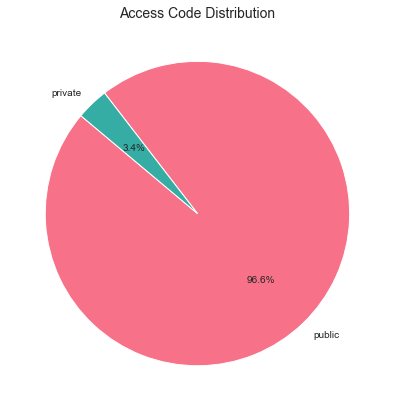

In [219]:
# Distribution of Access code
data = Ev_df2['access_code'].value_counts()
colors = sns.color_palette("husl", len(data))
plt.figure(figsize=(7,7))
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title("Access Code Distribution", fontsize=14)
plt.show()


Public is the mose popular

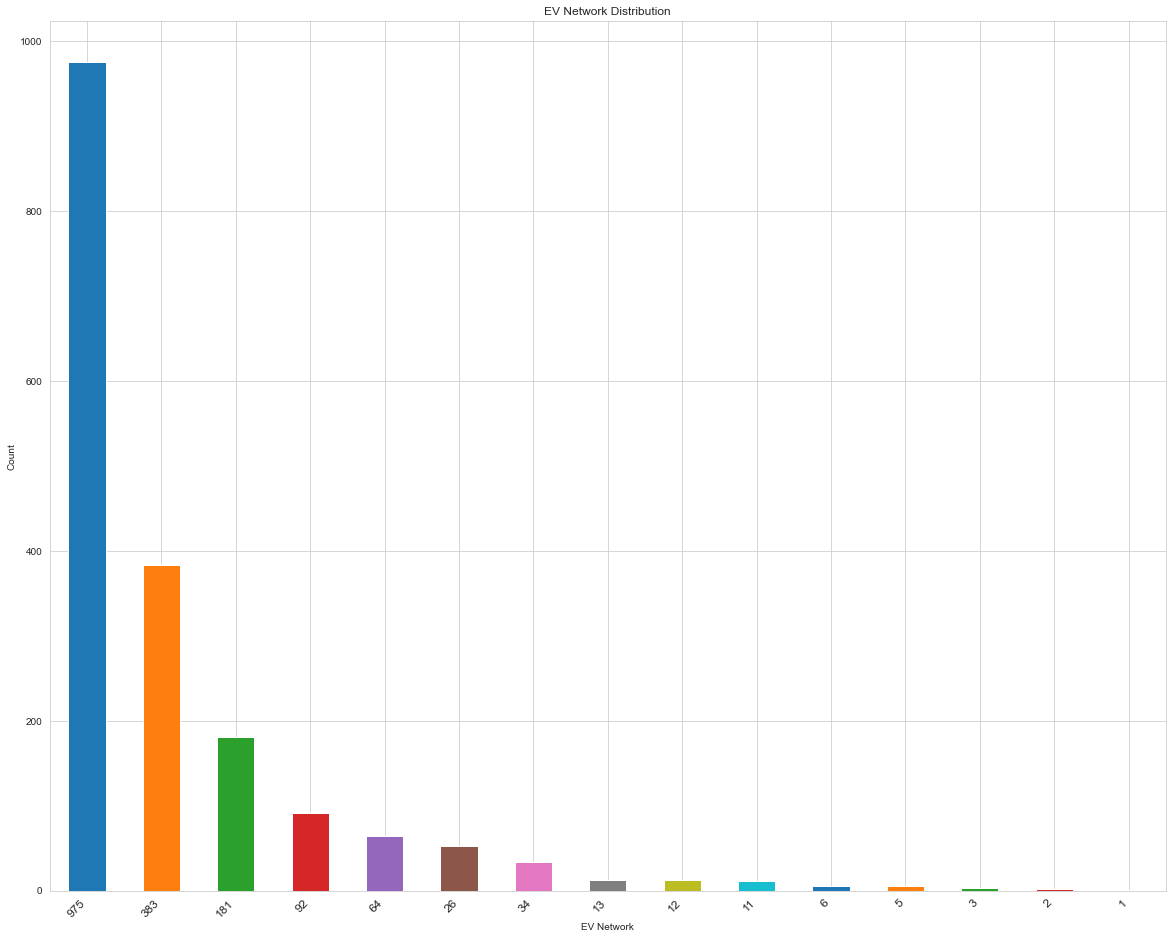

In [220]:
# which EV netwok is popular
# Get value counts
data = Ev_df2['ev_network_encoded'].value_counts()
colors = sns.color_palette("tab10", len(data))
plt.figure(figsize=(20,16))  
data.plot(kind='bar', color=colors)

plt.xlabel("EV Network")
plt.ylabel("Count")
plt.title("EV Network Distribution")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()


The ChargePoint network dominates with over 40000 EV charging stations, followed by non-networked stations, Blink, Shell Recharge, and Tesla. These providers account for most public chargers, shaping the accessibility of EV infrastructure.

At the other end, Gravity Charging Center, Matcha, Honey Badger, and OpConnect have the fewest stations, with some networks operating just a single location.

### Bivariate Analysis

<AxesSubplot:xlabel='ev_workplace_charging', ylabel='ev_level2_evse_num'>

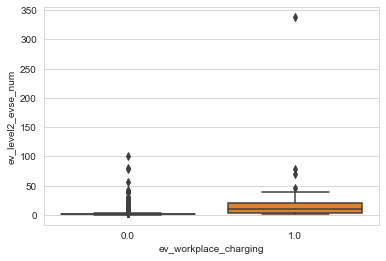

In [221]:
sns.boxplot(x='ev_workplace_charging', y='ev_level2_evse_num', data=Ev_df2)

In [222]:
# Plot Charging Stations on a Map
m = folium.Map(location=[Ev_df2['latitude'].mean(), Ev_df2['longitude'].mean()], zoom_start=6)
HeatMap(Ev_df2[['latitude', 'longitude']].values).add_to(m)
m 

In [223]:
Ev_df2['access_code_cleaned'].value_counts()  # Check public vs. private stations
Ev_df2.groupby('station_region')['access_hours'].value_counts() 

station_region                       access_hours
1003 EV 3                            24.0            1
1003 EV 4                            24.0            1
1003 EV 5                            24.0            1
1003 EV 6                            24.0            1
1003 EV 7                            24.0            1
                                                    ..
Whole Foods Market West Los Angeles  16.0            1
Will Rogers State Historic Park      0.0             1
Willowbrook Rosa Parks               24.0            1
Wilshire Country Club                24.0            1
Wilshire Vermont                     24.0            1
Name: access_hours, Length: 1757, dtype: int64

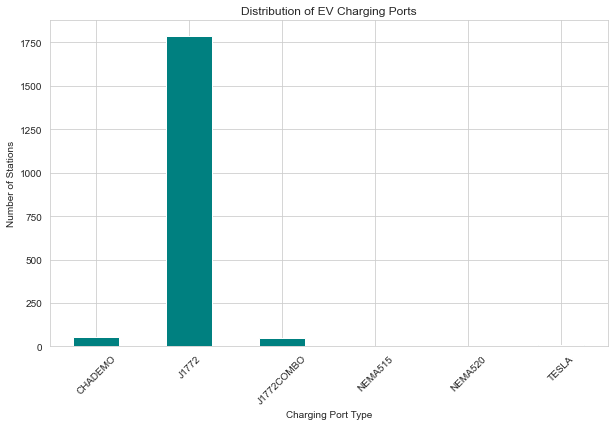

In [224]:
# Check the availability of different EV charging ports:
charging_ports = ['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA515', 'NEMA520', 'TESLA']

plt.figure(figsize=(10, 6))
Ev_df2[charging_ports].sum().plot(kind='bar', color='teal')
plt.xlabel("Charging Port Type")
plt.ylabel("Number of Stations")
plt.title("Distribution of EV Charging Ports")
plt.xticks(rotation=45)
plt.show()

The J1772 connector is the most common for Level 2 charging, available at over 60,000 stations. The J1772 Combo (CCS1) follows, found at around 10,000 stations, supporting Level fast charging.

In contrast, NEMA connectors (14-50, 520, and 515) are the least common in public charging networks, mainly used for home and private charging.

As EV adoption grows, J1772 remains the standard for Level 2 charging, while CCS1 plays a key role in fast charging infrastructure. NEMA outlets serve as a secondary option rather than a mainstream solution.

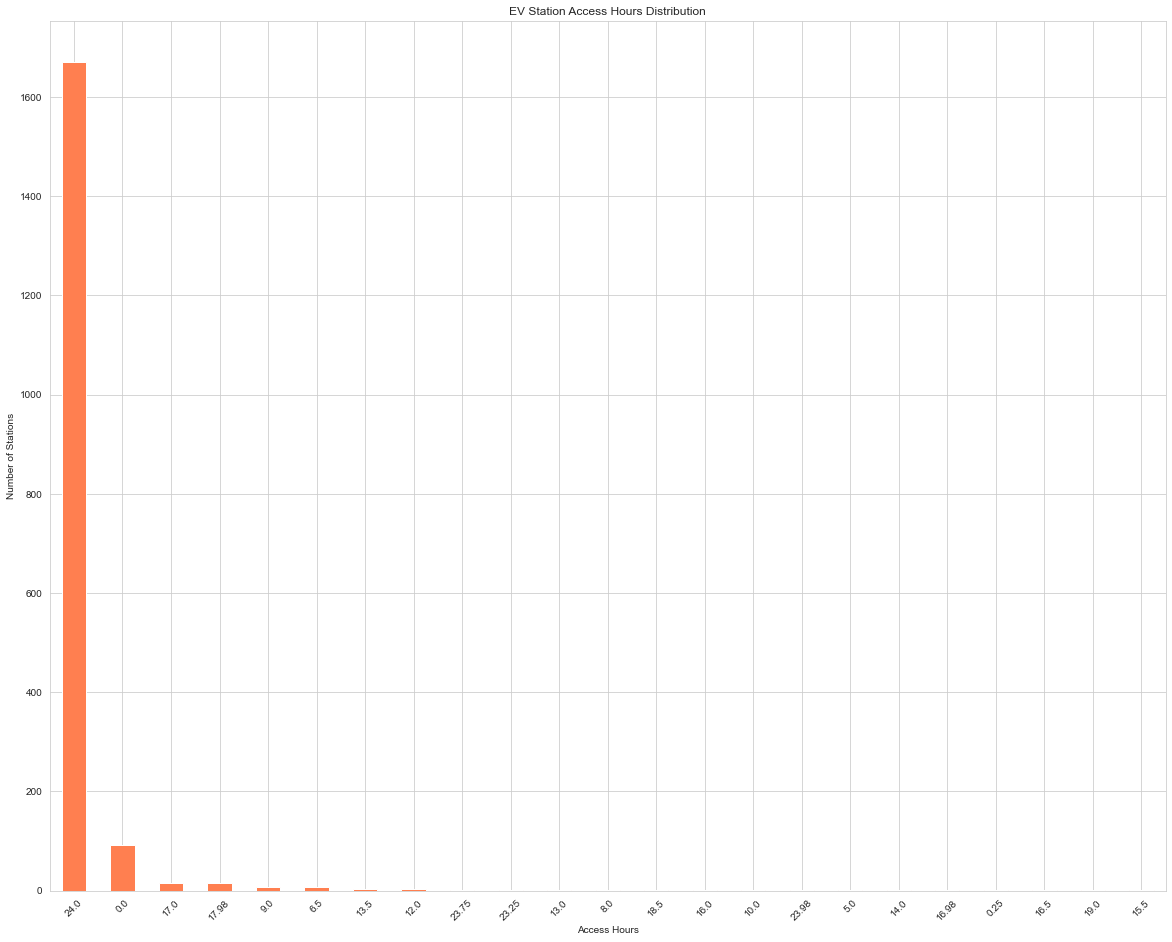

In [225]:
# Analyze access patterns if timestamps are available
plt.figure(figsize=(20, 16))
Ev_df2['access_hours'].value_counts().plot(kind='bar', color='coral')
plt.xlabel("Access Hours")
plt.ylabel("Number of Stations")
plt.title("EV Station Access Hours Distribution")
plt.xticks(rotation=45)
plt.show()

#### Multivariate analysis

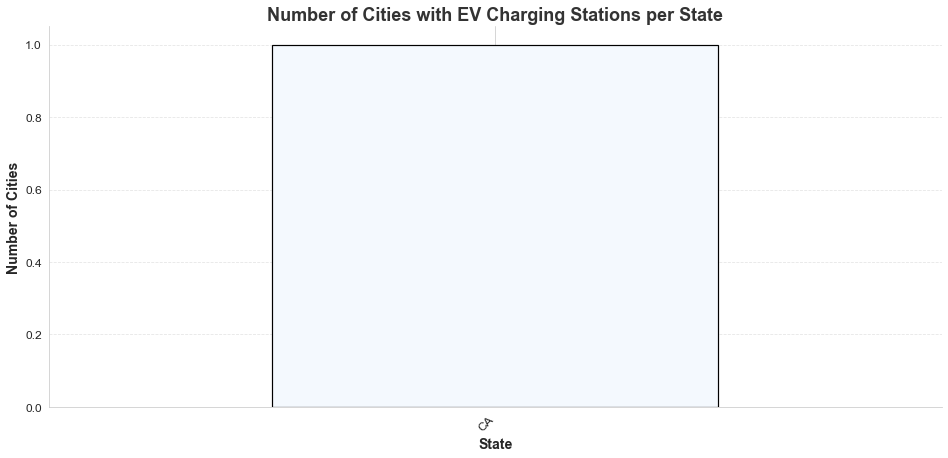

In [226]:
# Number Of Cities with Ev charging stations per state
sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
colors = sns.color_palette("Blues", len(df['state'].unique()))
ax = Ev_df2.groupby('state')['city'].nunique().sort_values(ascending=False).plot(
    kind='bar', 
    color=colors, 
    edgecolor='black',
    linewidth=1.2
)

plt.title("Number of Cities with EV Charging Stations per State", fontsize=18, fontweight='bold', color='#333')
plt.xlabel("State", fontsize=14, fontweight='bold')
plt.ylabel("Number of Cities", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()


Based on the distribution of cities with EV charging stations, the top five states leading in EV infrastructure are:

California (CA) – The undisputed EV leader, with the most chargers, the highest number of EVs, and big incentives to push for a gas-free future.

New York (NY) – Prioritizing urban charging, making it easier for city dwellers to own EVs, thanks to state-backed programs.

Pennsylvania (PA) – Investing in highway charging, ensuring EV drivers can travel seamlessly across the Northeast.

Texas (TX) – A fast-growing EV hub, fueled by Tesla’s Gigafactory, business-friendly policies, and the need for long-distance charging options.

New Jersey (NJ) – Small state, big impact—with generous EV rebates and a dense population driving demand for more chargers

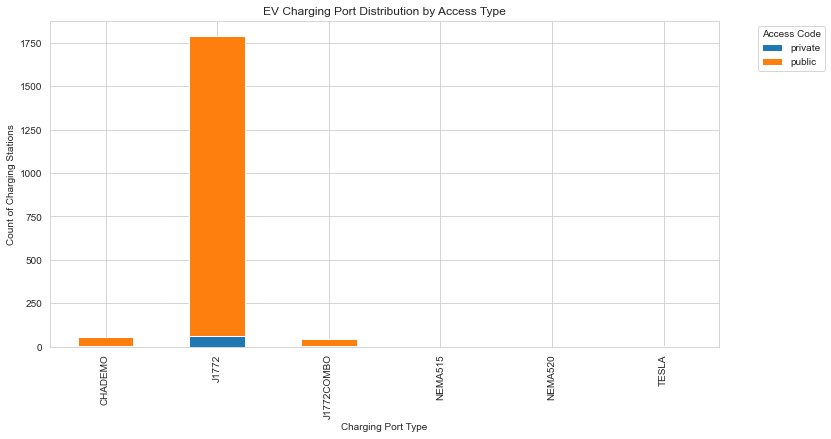

In [227]:
#  charging access (public vs. private) across charger types:
charging_ports = ['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA515', 'NEMA520', 'TESLA']

Ev_df2_grouped = Ev_df2.groupby('access_code')[charging_ports].sum()

Ev_df2_grouped.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Charging Port Type")
plt.ylabel("Count of Charging Stations")
plt.title("EV Charging Port Distribution by Access Type")
plt.legend(title="Access Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the plot, one thing stands out: J1772 dominates public charging, but it’s also present in private settings—just in smaller numbers.
While J1772 is used in both public and private charging, its dominance in public spaces is clear. Private charging, on the other hand, is more diverse—ranging from slow NEMA 5-15 outlets to dedicated home or fleet chargers.

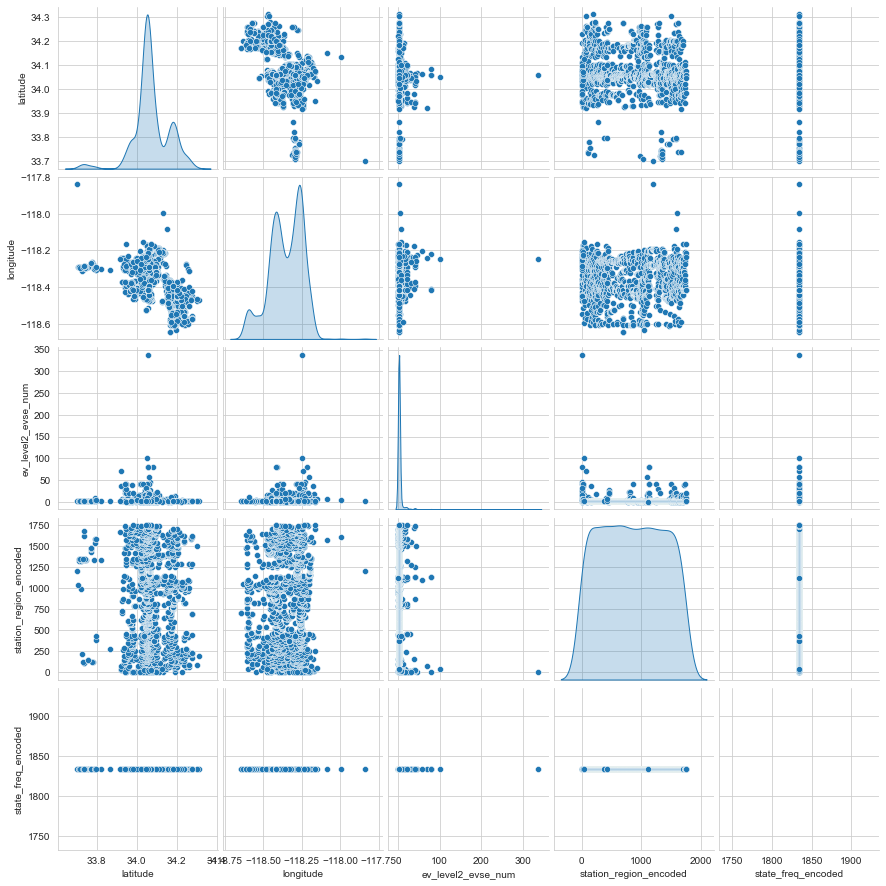

In [228]:
# Visualize interactions between numerical variables

sns.pairplot(Ev_df2[['latitude', 'longitude', 'ev_level2_evse_num', 
                      'station_region_encoded', 'state_freq_encoded']], diag_kind='kde')
plt.show()


## EV Charging Station Data Dictionary  

### **Location Information**  
- **`station_name`**: The name of the EV charging station, typically identifying the location or brand.  
- **`latitude`**: The north-south geographic coordinate of the station (in degrees).  
- **`longitude`**: The east-west geographic coordinate of the station (in degrees).  
- **`city`**: The city where the EV charging station is located.  
- **`state`**: The state or region where the station is located (if applicable).  
- **`country`**: The country where the EV charging station is located.  
- **`street_address`**: The full street address, including building number and street name.  

### **Operational Status & Access**  
- **`status_code`**: Indicates the station’s current status (e.g., "Available," "Out of Service," "In Use").  
- **`access_code`**: A code or identifier required to access the charging station (e.g., PIN, card number).  

### **Charging Equipment & Capabilities**  
- **`ev_connector_types`**: The types of connectors available (e.g., Type 1, Type 2, CCS, CHAdeMO).  
- **`ev_dc_fast_num`**: The number of **DC fast chargers**, which provide rapid charging.  
- **`ev_level1_evse_num`**: The number of **Level 1 EVSE units**, which offer slow charging (typically for residential use).  
- **`ev_level2_evse_num`**: The number of **Level 2 EVSE units**, which offer faster charging and are commonly found in public networks.  

### **Network & Pricing**  
- **`ev_network`**: The name of the network operating the station (e.g., Tesla Supercharger, ChargePoint).  
- **`ev_pricing`**: Information on the station's cost structure (e.g., per-minute, per-kWh, or membership-based).  


In [229]:
import warnings
warnings.filterwarnings("ignore")

In [230]:
pd.set_option('display.max_columns', None)
Ev_df2 = Ev_df2.drop(columns = ['station_name', 'city', 'state','street_address','access_code','ev_network','access_days_time', 'station_region', 'station_subregion' ])
Ev_df2

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address
126,34.040539,-118.271387,0.0,7.0,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39
127,34.059133,-118.248589,1.0,338.0,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2
131,34.066801,-118.227605,1.0,46.0,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6
132,34.036777,-118.368841,0.0,13.0,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1
133,34.039736,-118.236065,1.0,27.0,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,33.981682,-118.414946,0.0,20.0,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,1
97530,34.074090,-118.164775,0.0,1.0,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0,27
97545,34.056472,-118.417441,0.0,2.0,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0,11
97670,34.057401,-118.216279,0.0,2.0,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,4


In [231]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['longitude', 'latitude', 'ev_level2_evse_num']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the specified columns
Ev_df2[columns_to_scale] = scaler.fit_transform(Ev_df2[columns_to_scale])

# Columns that were not scaled (you can adjust this list as necessary)
columns_not_to_scale = [col for col in Ev_df2.columns if col not in columns_to_scale]

# Concatenate the scaled columns with the non-scaled columns
Ev_df2_scaled = Ev_df2[columns_not_to_scale + columns_to_scale]

# Display the updated DataFrame
Ev_df2_scaled


,ev_workplace_charging,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address,longitude,latitude,ev_level2_evse_num
126,0.0,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39,0.462683,0.557075,0.020710
127,1.0,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2,0.491072,0.587457,1.000000
131,1.0,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6,0.517203,0.599986,0.136095
132,0.0,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,0.341327,0.550929,0.038462
133,1.0,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,0.506668,0.555763,0.079882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,0.0,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,1,0.283915,0.460908,0.059172
97530,0.0,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0,27,0.595442,0.611895,0.002959
97545,0.0,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0,11,0.280807,0.583109,0.005917
97670,0.0,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,4,0.531306,0.584626,0.005917


#### The Cluster Model
1. Kmeans Model

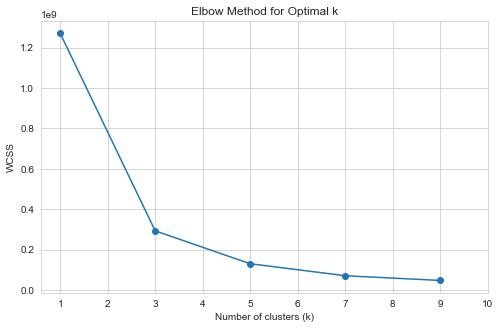

In [233]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11, 2):  # Check all values from k=1 to k=10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Ev_df2_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11, 2), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Ensure all k values are labeled
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # Silhouette score is only meaningful for k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Ev_df2_scaled)
    silhouette = silhouette_score(Ev_df2_scaled, labels)
    print(f"Silhouette Score for k={k}: {silhouette:.3f}")


Silhouette Score for k=2: 0.502
Silhouette Score for k=3: 0.554
Silhouette Score for k=4: 0.580
Silhouette Score for k=5: 0.611
Silhouette Score for k=6: 0.596
Silhouette Score for k=7: 0.607


In [ ]:
import seaborn as sns

# Subset only latitude & longitude
X = Ev_df2[['latitude', 'longitude']].copy()  # Keep original DataFrame structure
kmeans = KMeans(n_clusters=5, random_state=42)
Ev_df2['cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Ev_df2['longitude'], y=Ev_df2['latitude'], hue=Ev_df2['cluster'], palette="Set1", alpha=0.7)
plt.title("EV Station Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


In [55]:
Ev_df2.columns

Index(['latitude', 'longitude', 'ev_workplace_charging', 'ev_level2_evse_num',
       'station_region_encoded', 'station_subregion_encoded', 'access_hours',
       'state_freq_encoded', 'city_freq_encoded', 'access_code_cleaned',
       'ev_network_encoded', 'CHADEMO', 'J1772', 'J1772COMBO', 'NEMA515',
       'NEMA520', 'TESLA', 'status_code_E', 'status_code_P', 'status_code_T',
       'encoded_address', 'cluster'],
      dtype='object')

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

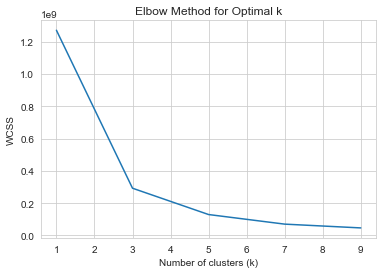

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Elbow Method to find optimal k
wcss = []
for i in range(1, 11, 2):  # Trying from k=1 to k=10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Ev_df2_scaled)
    wcss.append(kmeans.inertia_)

# Plotting WCSS (Within-Cluster Sum of Squares)
plt.plot(range(1, 11, 2), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [53]:
# Apply K-means with chosen k (e.g., k=3)
kmeans = KMeans(n_clusters= 5, random_state=42)
Ev_df2['kmeans_cluster'] = kmeans.fit_predict(Ev_df2_scaled)

# Evaluate with Silhouette Score
silhouette = silhouette_score(Ev_df2_scaled, Ev_df2['kmeans_cluster'])
print(f'Silhouette Score for K-means: {silhouette}')

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-means: 0.6110664595194599


In [61]:
Ev_df2_scaled

,ev_workplace_charging,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address,longitude,latitude,ev_level2_evse_num
126,0.0,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39,0.462683,0.557075,0.020710
127,1.0,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2,0.491072,0.587457,1.000000
131,1.0,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6,0.517203,0.599986,0.136095
132,0.0,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,0.341327,0.550929,0.038462
133,1.0,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,0.506668,0.555763,0.079882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,0.0,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,1,0.283915,0.460908,0.059172
97530,0.0,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0,27,0.595442,0.611895,0.002959
97545,0.0,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0,11,0.280807,0.583109,0.005917
97670,0.0,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,4,0.531306,0.584626,0.005917


* A Silhouette Score is a measure of how well each point in a cluster is matched to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1:

1. +1 indicates that the points are well clustered and far away from other clusters.
2. 0 means the points are on or very close to the boundary between clusters.
3. -1 indicates that the points are likely in the wrong cluster.

* Scores between 0.5 and 0.7: These indicate decent clustering. While it’s not perfect, it suggests that the clusters are reasonably well-formed with some separation.

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


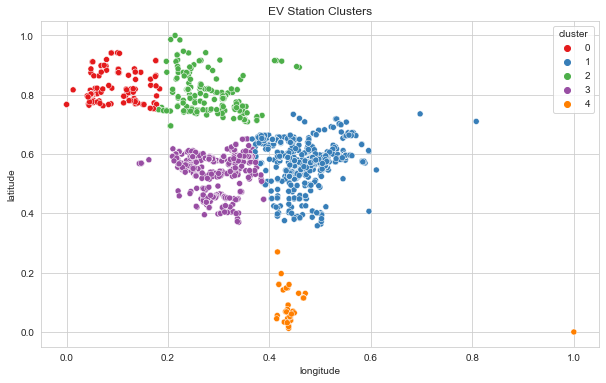

In [55]:
from sklearn.cluster import KMeans

X = Ev_df2_scaled[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
Ev_df2['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Ev_df2_scaled['longitude'], y=Ev_df2_scaled['latitude'], hue=Ev_df2['cluster'], palette="Set1")
plt.title("EV Station Clusters")
plt.show()

In [64]:
# Evaluate with Silhouette Score
silhouette = silhouette_score(Ev_df2_scaled, Ev_df2['cluster'])
print(f'Silhouette Score for K-means: {silhouette}')

Silhouette Score for K-means: -0.15474976979235522


In [56]:
Ev_df2

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address,cluster
126,0.557075,0.462683,0.0,0.020710,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39,1
127,0.587457,0.491072,1.0,1.000000,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2,1
131,0.599986,0.517203,1.0,0.136095,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6,1
132,0.550929,0.341327,0.0,0.038462,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,3
133,0.555763,0.506668,1.0,0.079882,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,0.460908,0.283915,0.0,0.059172,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,1,3
97530,0.611895,0.595442,0.0,0.002959,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0,27,1
97545,0.583109,0.280807,0.0,0.005917,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0,11,3
97670,0.584626,0.531306,0.0,0.005917,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,4,1


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


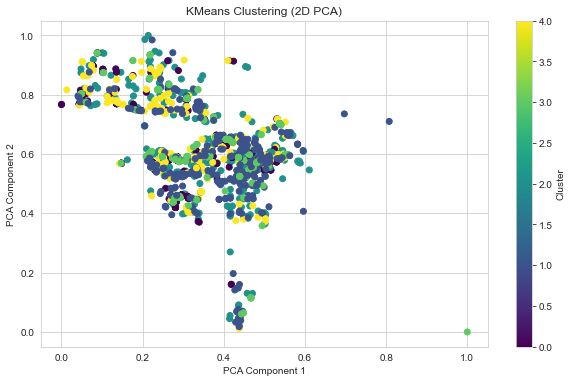

In [65]:
Ev_df2['kmeans_cluster'] = kmeans.fit_predict(Ev_df2)
# Scatter plot for KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(Ev_df2_scaled['longitude'], Ev_df2_scaled['latitude'], c=Ev_df2['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [111]:
Ev_df2

Series([], Name: cluster, dtype: int32)

In [57]:
Ev_df2

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA515,NEMA520,TESLA,status_code_E,status_code_P,status_code_T,encoded_address,kmeans_cluster
126,0.557075,0.462683,0.0,0.020710,0,0,15.5,1834,1834,1,92,0,1,0,0,0,0,1,0,0,39,2
127,0.587457,0.491072,1.0,1.000000,1,1,0.0,1834,1834,0,92,1,1,1,0,0,0,1,0,0,2,2
131,0.599986,0.517203,1.0,0.136095,1,2,0.0,1834,1834,0,92,1,1,0,0,0,0,1,0,0,6,2
132,0.550929,0.341327,0.0,0.038462,1,3,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,2
133,0.555763,0.506668,1.0,0.079882,1,4,0.0,1834,1834,0,92,0,1,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97433,0.460908,0.283915,0.0,0.059172,1744,1795,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,1,1
97530,0.611895,0.595442,0.0,0.002959,1745,1796,24.0,1834,1834,1,383,0,1,0,0,0,0,1,0,0,27,1
97545,0.583109,0.280807,0.0,0.005917,1746,1797,24.0,1834,1834,1,975,0,1,0,0,0,0,1,0,0,11,3
97670,0.584626,0.531306,0.0,0.005917,1747,1798,24.0,1834,1834,1,26,0,1,0,0,0,0,1,0,0,4,1


Preprocessing pipeline

In [ ]:
# Creating a pipeline
transformer = ColumnTransformer([
    ("cat",Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder())
        ]),categoricals),
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy='constant', fill_value = 0)),
        ("scaler",StandardScaler())
        ]),numericals)
])

In [ ]:
pipe = Pipeline([
    ("pre_pro",transformer),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

In [ ]:
# Train the model on the data set
pipe.fit(df_1)


In [ ]:
# Get the cluster labels for each data point
df_1['cluster'] = pipe.predict(df_1)

# Display the first few rows of the DataFrame with cluster labels
print(df_1.head(20))

In [ ]:
# Plot the clusters (latitude vs. longitude)
plt.scatter(df_1['latitude'], df_1['longitude'], c=df_1['cluster'], cmap='viridis')
plt.title("KMeans Clustering of EV Stations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if not isinstance(station_name, str):  # Handle NaN or non-string values
        return None, None

    station_name = station_name.strip()

    # Check if the station name contains a hyphen
    if ' - ' in station_name:
        return tuple(station_name.split(' - ', 1))  # Split at the first hyphen
    else:
        return station_name, station_name  # If no hyphen, return the name in both columns

# Apply the function to the 'station_name' column and create two new columns
Ev_df2[['station_region', 'station_subregion']] = Ev_df2['station_name'].apply(lambda x: pd.Series(clean_and_split_station_name(x)))

# Show the cleaned and split DataFrame
Ev_df2[['station_name', 'station_region', 'station_subregion']]
    


In [ ]:
 Drop missing values
Ev_df2 = Ev_df2.dropna(subset=["city"])

# Clean the city names
Ev_df2["city"] = Ev_df2["city"].str.lower().str.strip()

# Standardize common city variations
city_corrections = {
    "nyc": "new york",
    "sf": "san francisco",
    "san fran": "san francisco",
    "la": "los angeles",
}
Ev_df2["city"] = Ev_df2["city"].replace(city_corrections)

# Apply frequency encoding
city_counts = Ev_df2["city"].value_counts()
Ev_df2["city_freq_encoded"] = Ev_df2["city"].map(city_counts)

Ev_df2.head()


In [ ]:
# Handle missing values

# Drop rows with missing latitude or longitude as they are essential for spatial analysis
ev_cleaned = ev_filtered.dropna(subset=['latitude', 'longitude'])

# Fill missing network values with 'Unknown'
ev_cleaned['ev_network'].fillna('Unknown', inplace=True)

# Fill missing connector types with 'Unknown'
ev_cleaned['ev_connector_types'].fillna('Unknown', inplace=True)

# Fill missing charger counts with 0 (indicating no chargers of that type)
ev_cleaned['ev_dc_fast_num'].fillna(0, inplace=True)
ev_cleaned['ev_level1_evse_num'].fillna(0, inplace=True)
ev_cleaned['ev_level2_evse_num'].fillna(0, inplace=True)

# Fill missing pricing information with 'Not Available'
ev_cleaned['ev_pricing'].fillna('Not Available', inplace=True)

# Verify missing values have been handled
cleaned_missing = ev_cleaned.isnull().sum()

# Display cleaned dataset
import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned EV Charging Stations Dataset", dataframe=ev_cleaned)

cleaned_missing


### More EDA and visualization focusing on L.A. 

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the EV dataset
ev_stations = pd.read_csv('Alternative_Fueling_Stations.csv')

# Filter the dataset to focus on EV-related stations
ev_only = ev_stations[ev_stations['fuel_type_code'] == 'ELEC']

# Select relevant columns
ev_filtered = ev_only[['OBJECTID', 'access_code', 'access_days_time', 'date_last_confirmed', 'fuel_type_code',
                       'groups_with_access_code', 'id', 'open_date', 'status_code', 'station_name',
                       'updated_at', 'geocode_status', 'latitude', 'longitude', 'city', 'country', 'state',
                       'street_address', 'zip', 'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
                       'ev_workplace_charging', 'x', 'y']]

# Check for percentage of missing values
missing_percentage = (ev_filtered.isnull().sum() / len(ev_filtered)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

# Handle missing values with a more refined approach
# Drop rows with missing essential location data
ev_cleaned = ev_filtered.dropna(subset=['latitude', 'longitude', 'city', 'state'])

# Fill missing categorical values with 'Unknown'
categorical_cols = ev_cleaned.select_dtypes(include=['object']).columns
ev_cleaned[categorical_cols] = ev_cleaned[categorical_cols].fillna('Unknown')

# Fill missing numerical values with 0
ev_cleaned.fillna(0, inplace=True)

# Verify missing values have been handled
print("Missing values after handling:")
print(ev_cleaned.isnull().sum())

# Save cleaned dataset
ev_cleaned.to_csv('refined_cleaned_ev_stations.csv', index=False)

print("Refined cleaned dataset saved as 'refined_cleaned_ev_stations.csv'")


In [ ]:
ev_cleaned.shape

### EDA

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Display basic statistics
print(ev_la.describe())
print(ev_la.info())

# Plot distribution of EV networks in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_network'].value_counts().plot(kind='bar')
plt.title('Distribution of EV Networks in Los Angeles')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of EV connector types in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_connector_types'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of EV Connector Types in Los Angeles')
plt.xlabel('Connector Type')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Geospatial visualization for Los Angeles with Marker Clusters
la_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(la_map)

for idx, row in ev_la.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"{row['station_name']} - {row['ev_network']}", 
                  icon=folium.Icon(color='blue', icon='bolt', prefix='fa')).add_to(marker_cluster)

# Display map directly in notebook
display(la_map)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Display basic statistics
print(ev_la.describe())
print(ev_la.info())

# Plot distribution of EV networks in Los Angeles
plt.figure(figsize=(10, 6))
ev_la['ev_network'].value_counts().plot(kind='bar')
plt.title('Distribution of EV Networks in Los Angeles')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

# Generate a heatmap of EV charging station density in Los Angeles
la_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in ev_la.iterrows()]
HeatMap(heat_data).add_to(la_map)

# Display map directly in notebook
display(la_map)


Show Underserved Areas

Code to:

* Perform spatial density analysis using DBSCAN to identify underserved areas.
* Generate a heatmap of existing EV station coverage.
* Highlight underserved areas with markers on an interactive map displayed directly in your notebook.

In [ ]:
# Import necessary libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
import networkx as nx
from IPython.display import display

# Load the cleaned EV dataset
ev_cleaned = pd.read_csv('refined_cleaned_ev_stations.csv')

# Filter the dataset for Los Angeles
ev_la = ev_cleaned[(ev_cleaned['city'].str.contains('Los Angeles', case=False, na=False)) & (ev_cleaned['state'] == 'CA')]

# Perform spatial density analysis using DBSCAN to identify underserved areas
coords = ev_la[['latitude', 'longitude']].to_numpy()
clustering = DBSCAN(eps=0.01, min_samples=5).fit(coords)
ev_la['cluster'] = clustering.labels_
underserved = ev_la[ev_la['cluster'] == -1]

# Heatmap for station density
heat_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
heat_data = [[row['latitude'], row['longitude']] for index, row in ev_la.iterrows()]
HeatMap(heat_data).add_to(heat_map)
display(heat_map)

# Map for underserved areas
underserved_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
for idx, row in underserved.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=f"Underserved Area: {row['station_name']}", icon=folium.Icon(color='red')).add_to(underserved_map)
display(underserved_map)

# Network analysis map
G = nx.Graph()
for idx, row in ev_la.iterrows():
    G.add_node(idx, pos=(row['longitude'], row['latitude']))
for i, coord1 in enumerate(coords):
    for j, coord2 in enumerate(coords):
        if i != j:
            dist = ((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)**0.5
            if dist < 0.02:
                G.add_edge(i, j, weight=dist)
network_map = folium.Map(location=[ev_la['latitude'].mean(), ev_la['longitude'].mean()], zoom_start=10)
for edge in G.edges:
    point1 = ev_la.iloc[edge[0]][['latitude', 'longitude']]
    point2 = ev_la.iloc[edge[1]][['latitude', 'longitude']]
    folium.PolyLine([(point1.latitude, point1.longitude), (point2.latitude, point2.longitude)], color='blue', weight=1).add_to(network_map)
for idx, row in ev_la.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=3, color='green', fill=True).add_to(network_map)
display(network_map)

# Display number of underserved areas
print(f"Number of underserved areas identified: {len(underserved)}")


In [ ]:
from sklearn.cluster import KMeans

# Defining the number of clusters
n_clusters = 2 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Training the model
y_kmeans = kmeans.fit_predict(X_tfidf)

## Print the cluster assignments for each document
print(f"Cluster Assignments: {y_kmeans}")

In [ ]:
# Step 3: Predict the cluster assignments for each document
predictions = kmeans.predict(X_tfidf)

# Print the predictions
print(f"Predicted Cluster Assignments: {predictions}")

### Nairobi OpenStreet Road Netowrk Data

In [ ]:
# Import OpenStreet Map
import osmnx as ox
# Import Geopandas for geospatial Information
import geopandas as gpd

# Define the target location
city = "Nairobi, Kenya"

# Fetch road network
G = ox.graph_from_place(city, network_type="drive")

# Convert to DataFrame
nodes, edges = ox.graph_to_gdfs(G)
#edges.to_csv("nairobi_roads.csv")
print("Nairobi road data saved")


In [ ]:
### Loading OpenStreet Nairobi Data

data = pd.read_csv('nairobi_roads.csv')

data.head()

This dataset describes Nairobi's road network, with relevant features such as:

* osmid (OpenStreetMap ID)
* highway (road type classification)
* length (road segment length)
* geometry (road segment coordinates)
* lanes (number of lanes)
* junction (whether it's a roundabout or intersection)
* maxspeed (speed limits)

### Tailoring U.S.A data for Kenya

Since the dataset originates from the US, we need to extract only relevant data that can be adapted to the Kenyan context.

1. Filter only EV-related data: Remove non-EV stations (e.g., CNG, LPG) and retain stations where fuel_type_code = EV.
2. Extract relevant columns: Focus on features that can be applied in Kenya, such as:
    * access_code (public/private)
    * ev_pricing_fr (if pricing models are useful)
    * x, y (longitude and latitude)
    * ev_network_ids_posts (charging infrastructure details)
3. Find similar land-use patterns in Kenya (e.g., CBD, highways, malls).
4. Use Nairobi road network data to determine high-traffic areas.
5. Compare US charging station clustering patterns to predict optimal locations in Nairobi.

### Feature Engineering

Feature engineering by integrating the Nairobi road network dataset with the insights from Los Angeles.

Execution plan:

Load and preprocess the Nairobi road network dataset.
Create features such as:
Proximity to main roads,
Traffic flow estimates based on road types and lengths,
Accessibility and connectivity measures.
Match these features with potential EV charging station points to help determine optimal placement.